In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [3]:

# Load the dataset from the provided link
data = pd.read_csv("mobile_price/train.csv")



In [4]:
# Explore the dataset
print(data.head())



   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

In [5]:
# Remove the "price_range" column as we are performing clustering
X = data.drop("price_range", axis=1)



In [6]:
# Preprocess the data: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [7]:
# Perform PCA for dimensionality reduction (optional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)



In [8]:
# Determine the number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)



D:\ProgramforCS\ANACONDA\envs\Machine_Learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\ProgramforCS\ANACONDA\envs\Machine_Learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\ProgramforCS\ANACONDA\envs\Machine_Learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\ProgramforCS\ANACONDA\envs\Machine_Learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

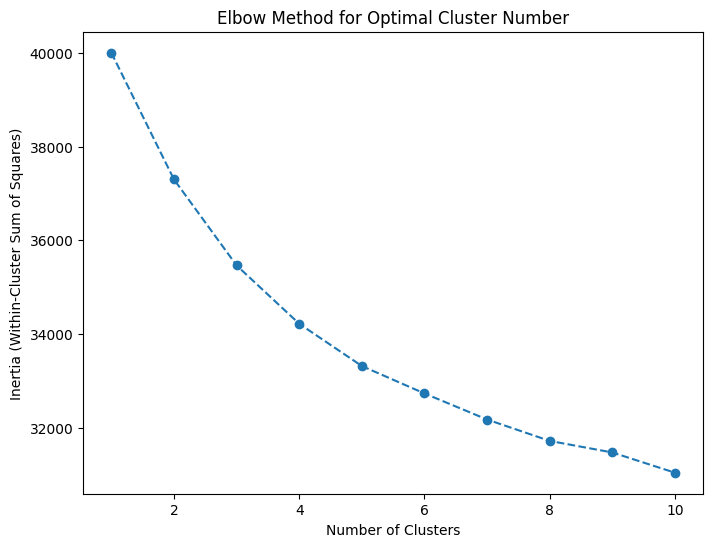

In [9]:
# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Cluster Number')
plt.show()



In [10]:
# Based on the Elbow Method, choose an optimal number of clusters
k = 4  # You can adjust this based on the plot

# Apply K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)



D:\ProgramforCS\ANACONDA\envs\Machine_Learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


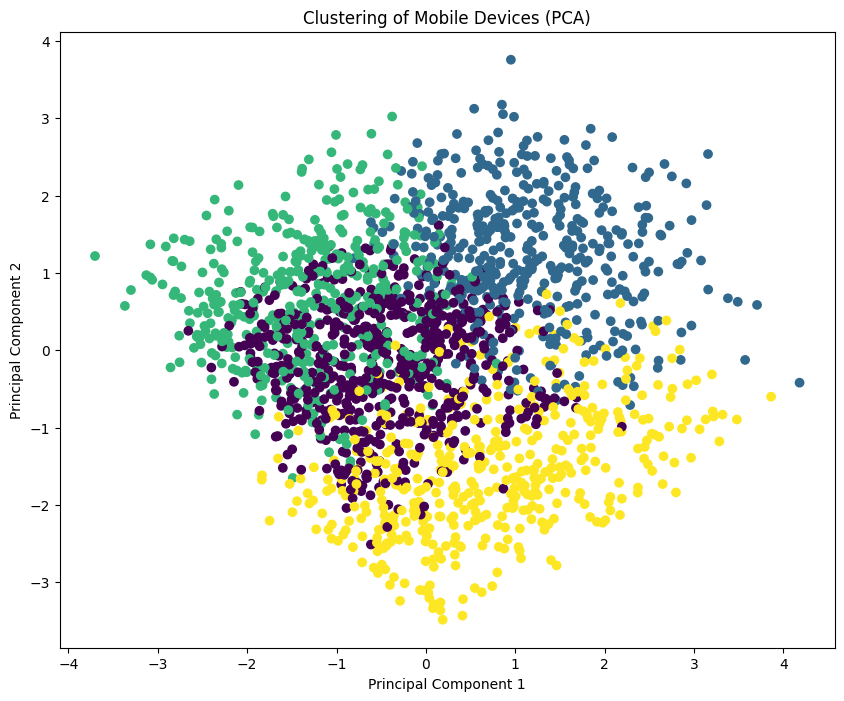

In [11]:
# Add cluster labels to the original dataset
data['cluster'] = clusters

# Visualize the clusters using PCA (you can choose different visualization techniques)
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clustering of Mobile Devices (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



In [12]:
# Explore the clusters and their characteristics
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)
print(cluster_centers)

# You can further analyze and interpret the clusters based on their characteristics

# Save the cluster labels to a CSV file if needed
data.to_csv('mobile_clusters.csv', index=False)


   battery_power      blue  clock_speed  dual_sim        fc        four_g  \
0    1272.710900  0.484992     1.535229  0.556082  1.935229  6.698262e-01   
1    1254.314978  0.497797     1.583260  0.477974  9.667401  6.607930e-01   
2    1185.432127  0.475113     1.380090  0.463801  2.352941  7.217195e-01   
3    1227.157113  0.524416     1.579406  0.520170  4.171975  4.440892e-16   

   int_memory     m_dep   mobile_wt   n_cores         pc    px_height  \
0   33.491311  0.487362  137.255924  4.330174   6.906793   420.876777   
1   28.400881  0.500661  143.449339  4.405286  16.185022   587.066079   
2   33.205882  0.514932  141.554299  4.843891   7.877828  1003.348416   
3   32.530786  0.509766  139.961783  4.583864   9.832272   666.227176   

      px_width          ram       sc_h      sc_w  talk_time       three_g  \
0  1053.526066  2061.364929  10.747235  4.338073  10.968404  1.000000e+00   
1  1202.656388  2204.072687  12.264317  5.563877  11.257709  9.889868e-01   
2  1588.414027  2